# generate_error_table

## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import os

%matplotlib inline

## load data

In [57]:
df0 = pd.read_csv('data/20230221/equaldistinctcount_20230221.csv')
df1 = pd.read_csv('data/20230221/equiheight_20230221.csv')
df2 = pd.read_csv('data/20230221/equiwidth_20230221.csv')
df3 = pd.read_csv('data/20230221/gdy_20230221.csv')
df4 = pd.read_csv('data/20230221/maxdiff_20230221.csv')
df5 = pd.read_csv('data/20230221/maxdiff_area_20230224.csv')
df = pd.concat([df0, df1, df2, df3, df4, df5], axis=0)
#df = df.fillna('TPC-DS')

## generate errors

In [58]:
def generate_errors(df):
    df = df.copy()  # Convenience
    
    df['absolute_error'] = np.absolute(df['estimated_output'] - df['real_output'])
    df['relative_error'] = df['absolute_error'] / df['real_output']
    df['x'] = df['estimated_output'] / df['real_output']
    df['1/x'] = 1 / df['x']
    df['q_error'] = df[['x','1/x']].max(axis=1)
    df['real_output_lower_bound'] = df['real_output']
    df['real_output_lower_bound'] = df['real_output_lower_bound'].clip(1)
    df['estimated_output_lower_bound'] = df['estimated_output']
    df['estimated_output_lower_bound'] = df['estimated_output_lower_bound'].clip(1)
    df['pseudo_x'] = df['estimated_output_lower_bound'] / df['real_output_lower_bound']
    df['pseudo_1/x'] = 1 / df['pseudo_x']
    df['pseudo_q_error'] = df[['pseudo_x','pseudo_1/x']].max(axis=1)
    df['mean_squared_error'] = df['absolute_error'] ** 2
    df.drop(['x', '1/x', 'real_output_lower_bound', 'estimated_output_lower_bound', 'pseudo_x', 'pseudo_1/x'], axis=1, inplace = True)

    return df

## result

### with_NULLs

In [59]:
df_with_errors = generate_errors(df)
df_with_errors

df_with_errors.groupby([#"operator_type",
                        "benchmark",
                        "histogram"]).agg(root_mean_squared_error=("mean_squared_error", lambda x: np.sqrt(np.mean(x))),
                                          mean_absolute_error=("absolute_error", np.mean),
                                          mean_relative_error=("relative_error", np.mean),
                                          mean_q_error=("q_error", np.mean),
                                          mean_pseudo_q_error=("pseudo_q_error", np.mean))

root_mean_squared_error  \
benchmark histogram                                              
JoinOrder EqualDistinctCountHistogram             4.436989e+05   
          EquiHeightHistogram                     4.923148e+05   
          EquiWidthHistogram                      4.961650e+05   
          GDYHistogram                            4.950823e+05   
          MaxDiffAreaHistogram                    5.300547e+05   
          MaxDiffFrequencyHistogram               5.053823e+05   
TPC-DS    EqualDistinctCountHistogram             1.412218e+06   
          EquiHeightHistogram                     1.414673e+06   
          EquiWidthHistogram                      1.475394e+06   
          GDYHistogram                            1.405704e+06   
          MaxDiffAreaHistogram                    1.417764e+06   
          MaxDiffFrequencyHistogram               1.409846e+06   
TPC-H     EqualDistinctCountHistogram             8.342819e+06   
          EquiHeightHistogram                     8.619737e+06   
          EquiWidthHistogram                      8.635061e+06   
          GDYHistogram                            8.342298e+06   
          MaxDiffAreaHistogram                    8.619179e+06   
          MaxDiffFrequencyHistogram               8.346457e+06   

                                       mean_absolute_error  \
benchmark histogram                                          
JoinOrder EqualDistinctCountHistogram         1.162157e+05   
          EquiHeightHistogram                 1.180125e+05   
          EquiWidthHistogram                  1.180460e+05   
          GDYHistogram                        1.173108e+05   
          MaxDiffAreaHistogram                1.279738e+05   
          MaxDiffFrequencyHistogram           1.241232e+05   
TPC-DS    EqualDistinctCountHistogram         6.265854e+05   
          EquiHeightHistogram                 6.302854e+05   
          EquiWidthHistogram                  6.536177e+05   
          GDYHistogram                        5.858548e+05   
          MaxDiffAreaHistogram                6.330193e+05   
          MaxDiffFrequencyHistogram           6.169429e+05   
TPC-H     EqualDistinctCountHistogram         1.854357e+06   
          EquiHeightHistogram                 2.081983e+06   
          EquiWidthHistogram                  2.141277e+06   
          GDYHistogram                        1.863193e+06   
          MaxDiffAreaHistogram                2.072990e+06   
          MaxDiffFrequencyHistogram           1.872331e+06   

                                       mean_relative_error  mean_q_error  \
benchmark histogram                                                        
JoinOrder EqualDistinctCountHistogram                  NaN           NaN   
          EquiHeightHistogram                          NaN           NaN   
          EquiWidthHistogram                           NaN           NaN   
          GDYHistogram                                 NaN           NaN   
          MaxDiffAreaHistogram                         NaN           NaN   
          MaxDiffFrequencyHistogram                    NaN           NaN   
TPC-DS    EqualDistinctCountHistogram                  NaN           NaN   
          EquiHeightHistogram                          NaN           NaN   
          EquiWidthHistogram                           NaN           NaN   
          GDYHistogram                           44.320481           NaN   
          MaxDiffAreaHistogram                         NaN           NaN   
          MaxDiffFrequencyHistogram                    NaN           NaN   
TPC-H     EqualDistinctCountHistogram         26100.439606  26114.213733   
          EquiHeightHistogram                 30284.239488  30298.063391   
          EquiWidthHistogram                  31512.937851  31519.749527   
          GDYHistogram                        30628.350620           NaN   
          MaxDiffAreaHistogram                30201.427312  30217.747402   
          MaxDiffFrequencyHistogr

### without_NULLs

Removed -462 (5.39%) rows because the 'real_output' cell was zero.
Removed -2083 (24.31%) rows because the 'estimated_output' cell was zero.


root_mean_squared_error  \
operator_type benchmark histogram                                              
JoinHashRight JoinOrder EqualDistinctCountHistogram             1.648413e+05   
                        EquiHeightHistogram                     3.624519e+05   
                        EquiWidthHistogram                      4.386096e+05   
                        GDYHistogram                            4.598774e+05   
                        MaxDiffAreaHistogram                    2.104070e+05   
                        MaxDiffFrequencyHistogram               2.069615e+05   
              TPC-DS    EqualDistinctCountHistogram             2.134485e+06   
                        EquiHeightHistogram                     2.299790e+06   
                        EquiWidthHistogram                      2.463096e+06   
                        GDYHistogram                            2.449285e+06   
                        MaxDiffAreaHistogram                    1.758537e+06   
                        MaxDiffFrequencyHistogram               2.493074e+06   
              TPC-H     EqualDistinctCountHistogram             1.084254e+06   
                        EquiHeightHistogram                     5.393710e+06   
                        EquiWidthHistogram                      5.402462e+06   
                        GDYHistogram                            5.393844e+06   
                        MaxDiffAreaHistogram                    6.215776e+06   
                        MaxDiffFrequencyHistogram               6.237605e+06   

                                                     mean_absolute_error  \
operator_type benchmark histogram                                          
JoinHashRight JoinOrder EqualDistinctCountHistogram         8.605534e+04   
                        EquiHeightHistogram                 1.159799e+05   
                        EquiWidthHistogram                  1.805818e+05   
                        GDYHistogram                        2.241147e+05   
                        MaxDiffAreaHistogram                1.049460e+05   
                        MaxDiffFrequencyHistogram           1.000172e+05   
              TPC-DS    EqualDistinctCountHistogram         1.282116e+06   
                        EquiHeightHistogram                 1.565081e+06   
                        EquiWidthHistogram                  1.693140e+06   
                        GDYHistogram                        1.579231e+06   
                        MaxDiffAreaHistogram                1.250960e+06   
                        MaxDiffFrequencyHistogram           1.759767e+06   
              TPC-H     EqualDistinctCountHistogram         7.036871e+05   
                        EquiHeightHistogram                 2.412886e+06   
                        EquiWidthHistogram                  2.562732e+06   
                        GDYHistogram                        2.424657e+06   
                        MaxDiffAreaHistogram                3.130493e+06   
                        MaxDiffFrequencyHistogram           3.188598e+06   

                                                     mean_relative_error  \
operator_type benchmark histogram                                          
JoinHashRight JoinOrder EqualDistinctCountHistogram          5197.374866   
                        EquiHeightHistogram                     3.397823   
                        EquiWidthHistogram                      4.051988   
                        GDYHistogram                            2.616635   
                        MaxDiffAreaHistogram                    2.547037   
                        MaxDiffFrequencyHistogram               3.059257   
              TPC-DS    EqualDistinctCountHistogram            20.160295   
                        EquiHeightHistogram                    22.840825   
                        EquiWidthHistogram                     13.310679   
                        GDYHistogram                            0.727100   
                   

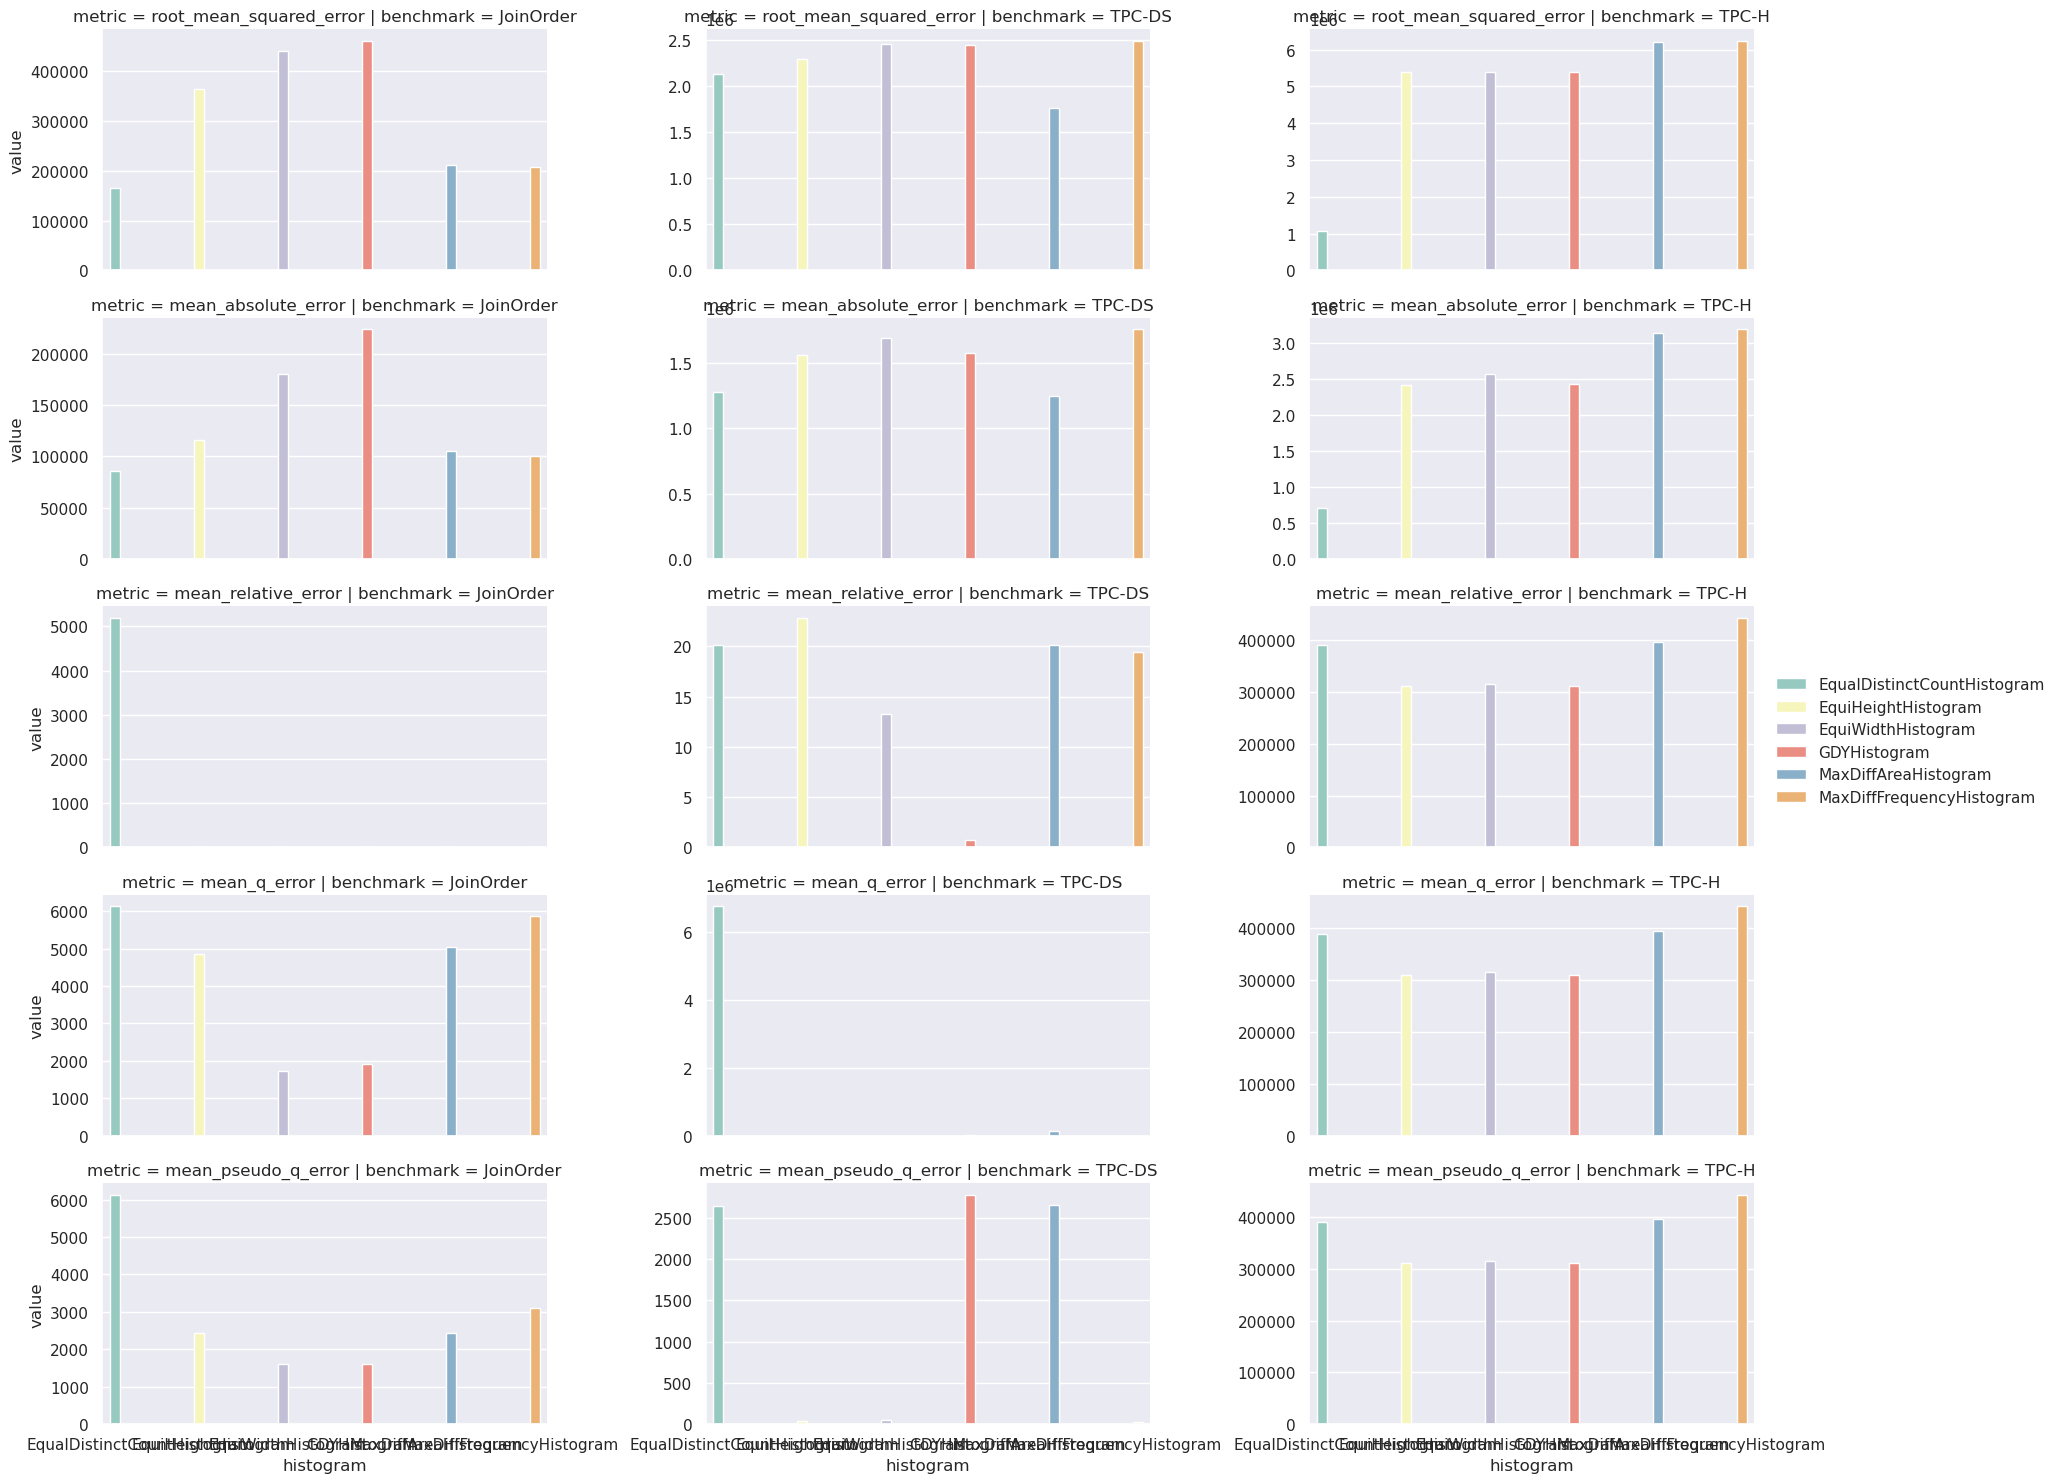

root_mean_squared_error  \
operator_type benchmark histogram                                              
JoinHashLeft  JoinOrder EqualDistinctCountHistogram             6.335598e+05   
                        EquiHeightHistogram                     6.522316e+05   
                        EquiWidthHistogram                      6.398711e+05   
                        GDYHistogram                            6.351529e+05   
                        MaxDiffAreaHistogram                    6.935959e+05   
                        MaxDiffFrequencyHistogram               6.588032e+05   
              TPC-DS    EqualDistinctCountHistogram             1.774286e+06   
                        EquiHeightHistogram                     1.685472e+06   
                        EquiWidthHistogram                      1.760902e+06   
                        GDYHistogram                            1.610161e+06   
                        MaxDiffAreaHistogram                    1.571703e+06   
                        MaxDiffFrequencyHistogram               1.402974e+06   
              TPC-H     EqualDistinctCountHistogram             1.257028e+07   
                        EquiHeightHistogram                     9.832002e+06   
                        EquiWidthHistogram                      1.054154e+07   
                        GDYHistogram                            1.008472e+07   
                        MaxDiffAreaHistogram                    1.172904e+07   
                        MaxDiffFrequencyHistogram               1.173008e+07   

                                                     mean_absolute_error  \
operator_type benchmark histogram                                          
JoinHashLeft  JoinOrder EqualDistinctCountHistogram         1.992517e+05   
                        EquiHeightHistogram                 1.909339e+05   
                        EquiWidthHistogram                  1.863520e+05   
                        GDYHistogram                        1.835402e+05   
                        MaxDiffAreaHistogram                2.063311e+05   
                        MaxDiffFrequencyHistogram           1.999289e+05   
              TPC-DS    EqualDistinctCountHistogram         9.637544e+05   
                        EquiHeightHistogram                 9.328165e+05   
                        EquiWidthHistogram                  1.002808e+06   
                        GDYHistogram                        8.221988e+05   
                        MaxDiffAreaHistogram                8.409208e+05   
                        MaxDiffFrequencyHistogram           7.387786e+05   
              TPC-H     EqualDistinctCountHistogram         3.301088e+06   
                        EquiHeightHistogram                 2.375266e+06   
                        EquiWidthHistogram                  2.821432e+06   
                        GDYHistogram                        2.512383e+06   
                        MaxDiffAreaHistogram                3.196270e+06   
                        MaxDiffFrequencyHistogram           3.191865e+06   

                                                     mean_relative_error  \
operator_type benchmark histogram                                          
JoinHashLeft  JoinOrder EqualDistinctCountHistogram           671.053267   
                        EquiHeightHistogram                  1045.481360   
                        EquiWidthHistogram                    863.068506   
                        GDYHistogram                          614.215051   
                        MaxDiffAreaHistogram                 1449.867027   
                        MaxDiffFrequencyHistogram            1022.800251   
              TPC-DS    EqualDistinctCountHistogram            41.249988   
                        EquiHeightHistogram                     6.325063   
                        EquiWidthHistogram                     45.855013   
                        GDYHistogram                            0.967237   
                   

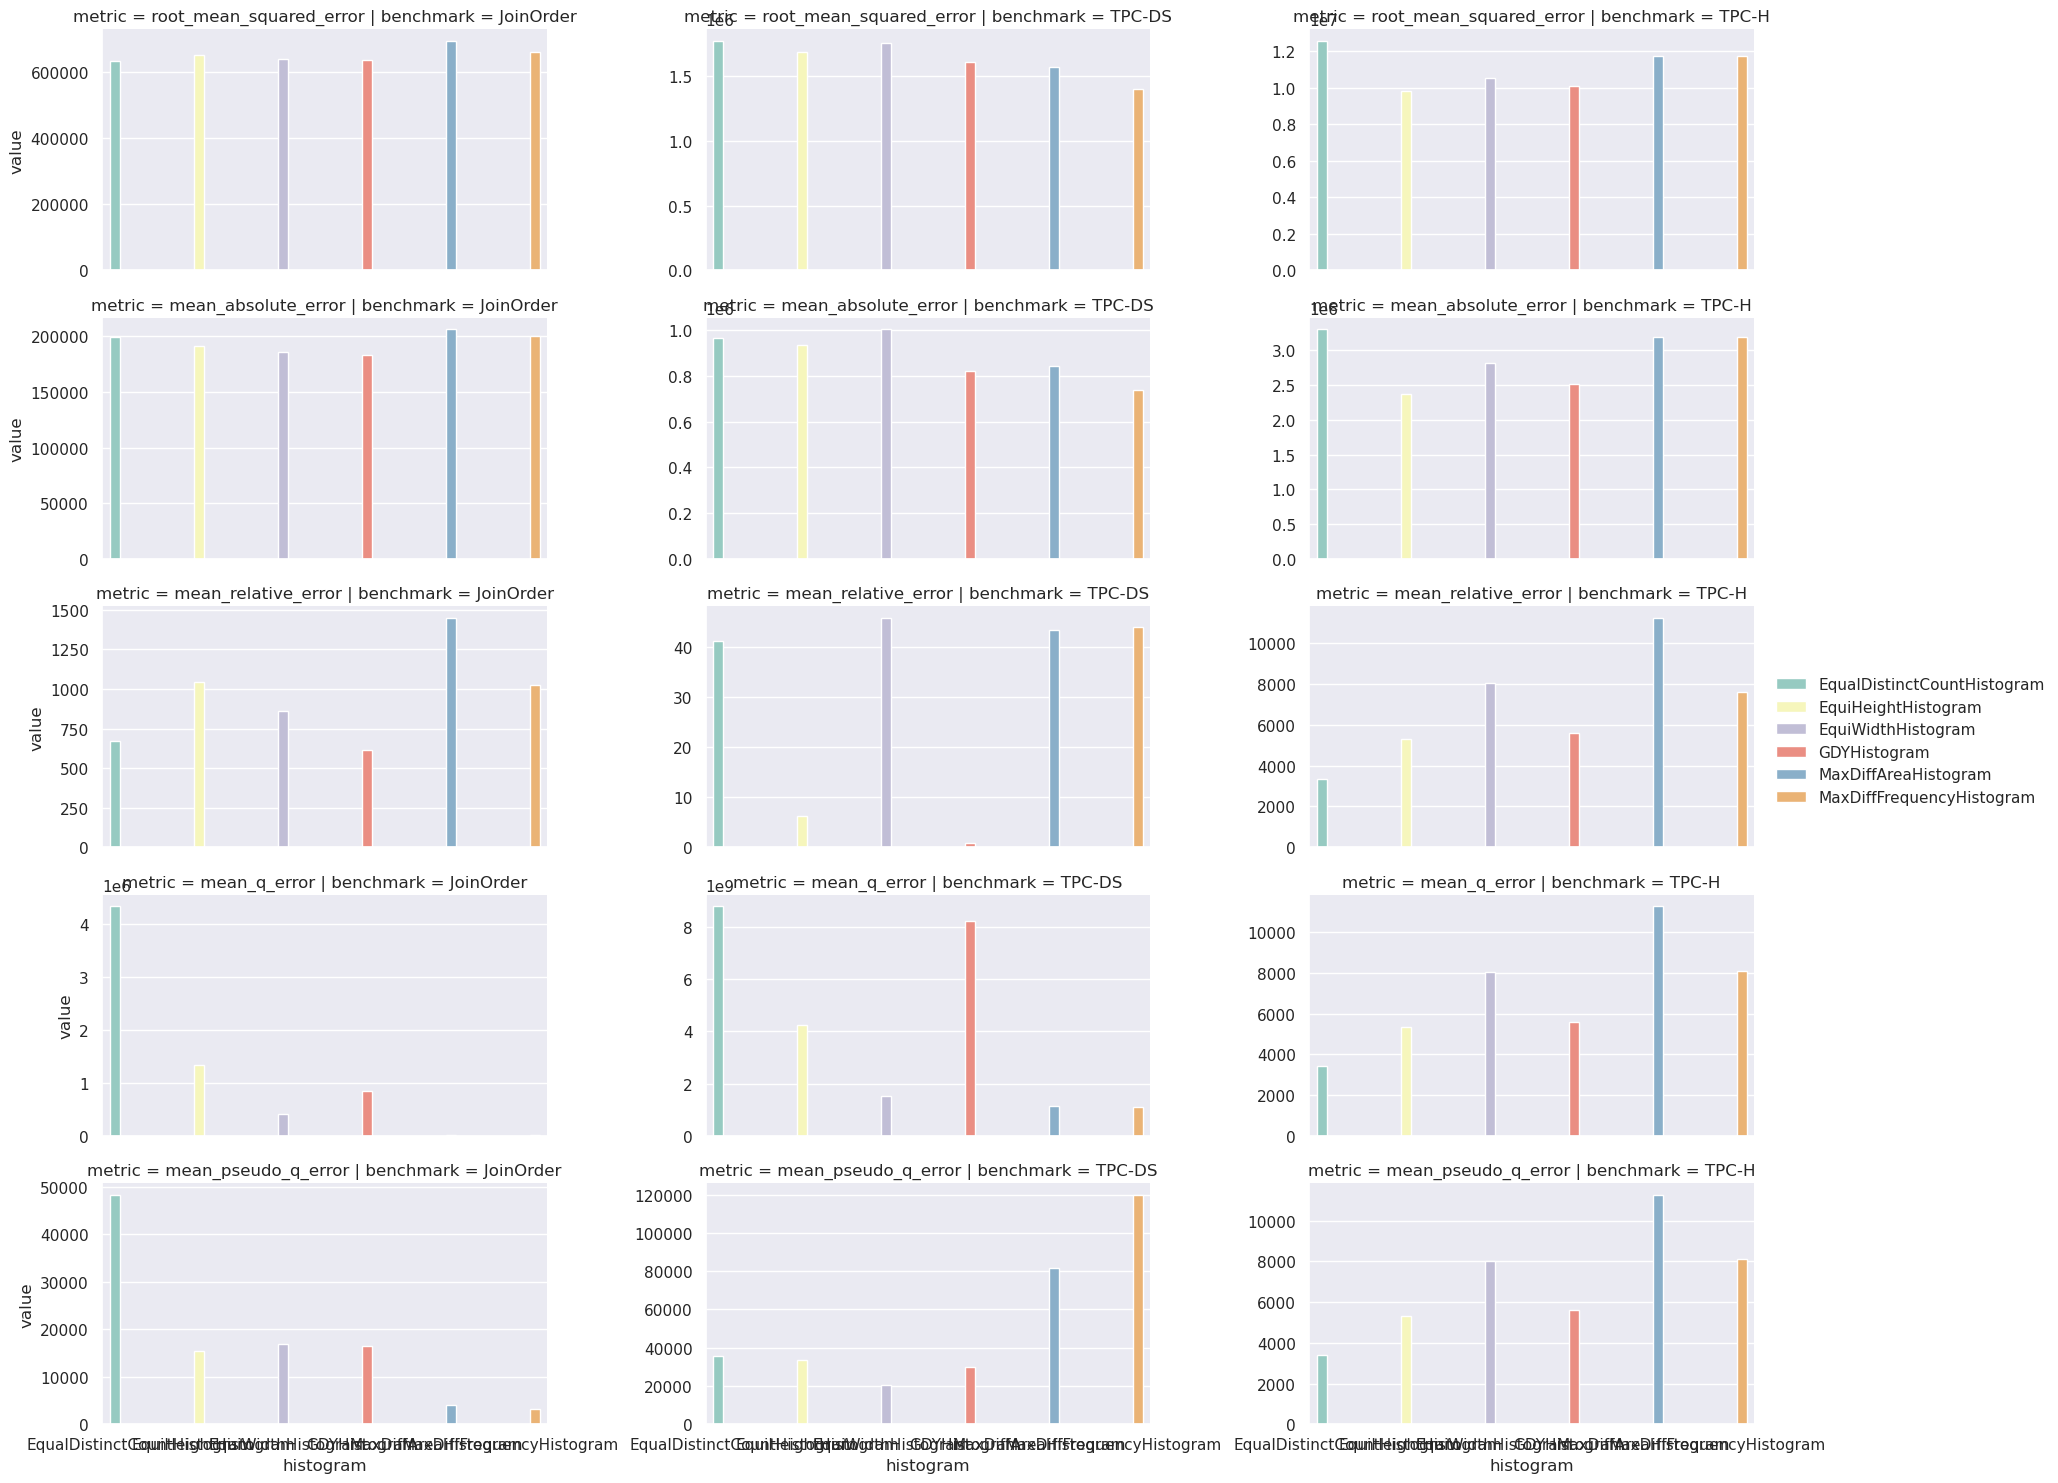

root_mean_squared_error  \
operator_type benchmark histogram                                              
TableScan     JoinOrder EqualDistinctCountHistogram             2.044721e+05   
                        EquiHeightHistogram                     1.345921e+05   
                        EquiWidthHistogram                      1.380658e+05   
                        GDYHistogram                            1.380081e+05   
                        MaxDiffAreaHistogram                    1.331809e+05   
                        MaxDiffFrequencyHistogram               1.343949e+05   
              TPC-DS    EqualDistinctCountHistogram             1.295072e+04   
                        EquiHeightHistogram                     1.379782e+04   
                        EquiWidthHistogram                      3.814474e+04   
                        GDYHistogram                            3.347473e+04   
                        MaxDiffAreaHistogram                    1.408522e+04   
                        MaxDiffFrequencyHistogram               1.352527e+04   
              TPC-H     EqualDistinctCountHistogram             2.720480e+05   
                        EquiHeightHistogram                     3.634222e+06   
                        EquiWidthHistogram                      3.498710e+06   
                        GDYHistogram                            2.939179e+05   
                        MaxDiffAreaHistogram                    4.037440e+06   
                        MaxDiffFrequencyHistogram               4.221939e+05   

                                                     mean_absolute_error  \
operator_type benchmark histogram                                          
TableScan     JoinOrder EqualDistinctCountHistogram         57117.156589   
                        EquiHeightHistogram                 15065.801392   
                        EquiWidthHistogram                  15678.843525   
                        GDYHistogram                        15591.567214   
                        MaxDiffAreaHistogram                10393.528614   
                        MaxDiffFrequencyHistogram           10583.886280   
              TPC-DS    EqualDistinctCountHistogram          1446.050024   
                        EquiHeightHistogram                  1638.218156   
                        EquiWidthHistogram                  10806.092838   
                        GDYHistogram                         5013.054306   
                        MaxDiffAreaHistogram                 1688.307281   
                        MaxDiffFrequencyHistogram            1549.175322   
              TPC-H     EqualDistinctCountHistogram         91862.253906   
                        EquiHeightHistogram                670539.445946   
                        EquiWidthHistogram                 656217.425000   
                        GDYHistogram                       112063.424403   
                        MaxDiffAreaHistogram               824749.002083   
                        MaxDiffFrequencyHistogram          159617.252155   

                                                     mean_relative_error  \
operator_type benchmark histogram                                          
TableScan     JoinOrder EqualDistinctCountHistogram             2.806855   
                        EquiHeightHistogram                     1.849161   
                        EquiWidthHistogram                      1.910314   
                        GDYHistogram                            1.911560   
                        MaxDiffAreaHistogram                    1.828219   
                        MaxDiffFrequencyHistogram               1.861703   
              TPC-DS    EqualDistinctCountHistogram             0.088151   
                        EquiHeightHistogram                     0.155695   
                        EquiWidthHistogram                      0.113147   
                        GDYHistogram                            0.151462   
                   

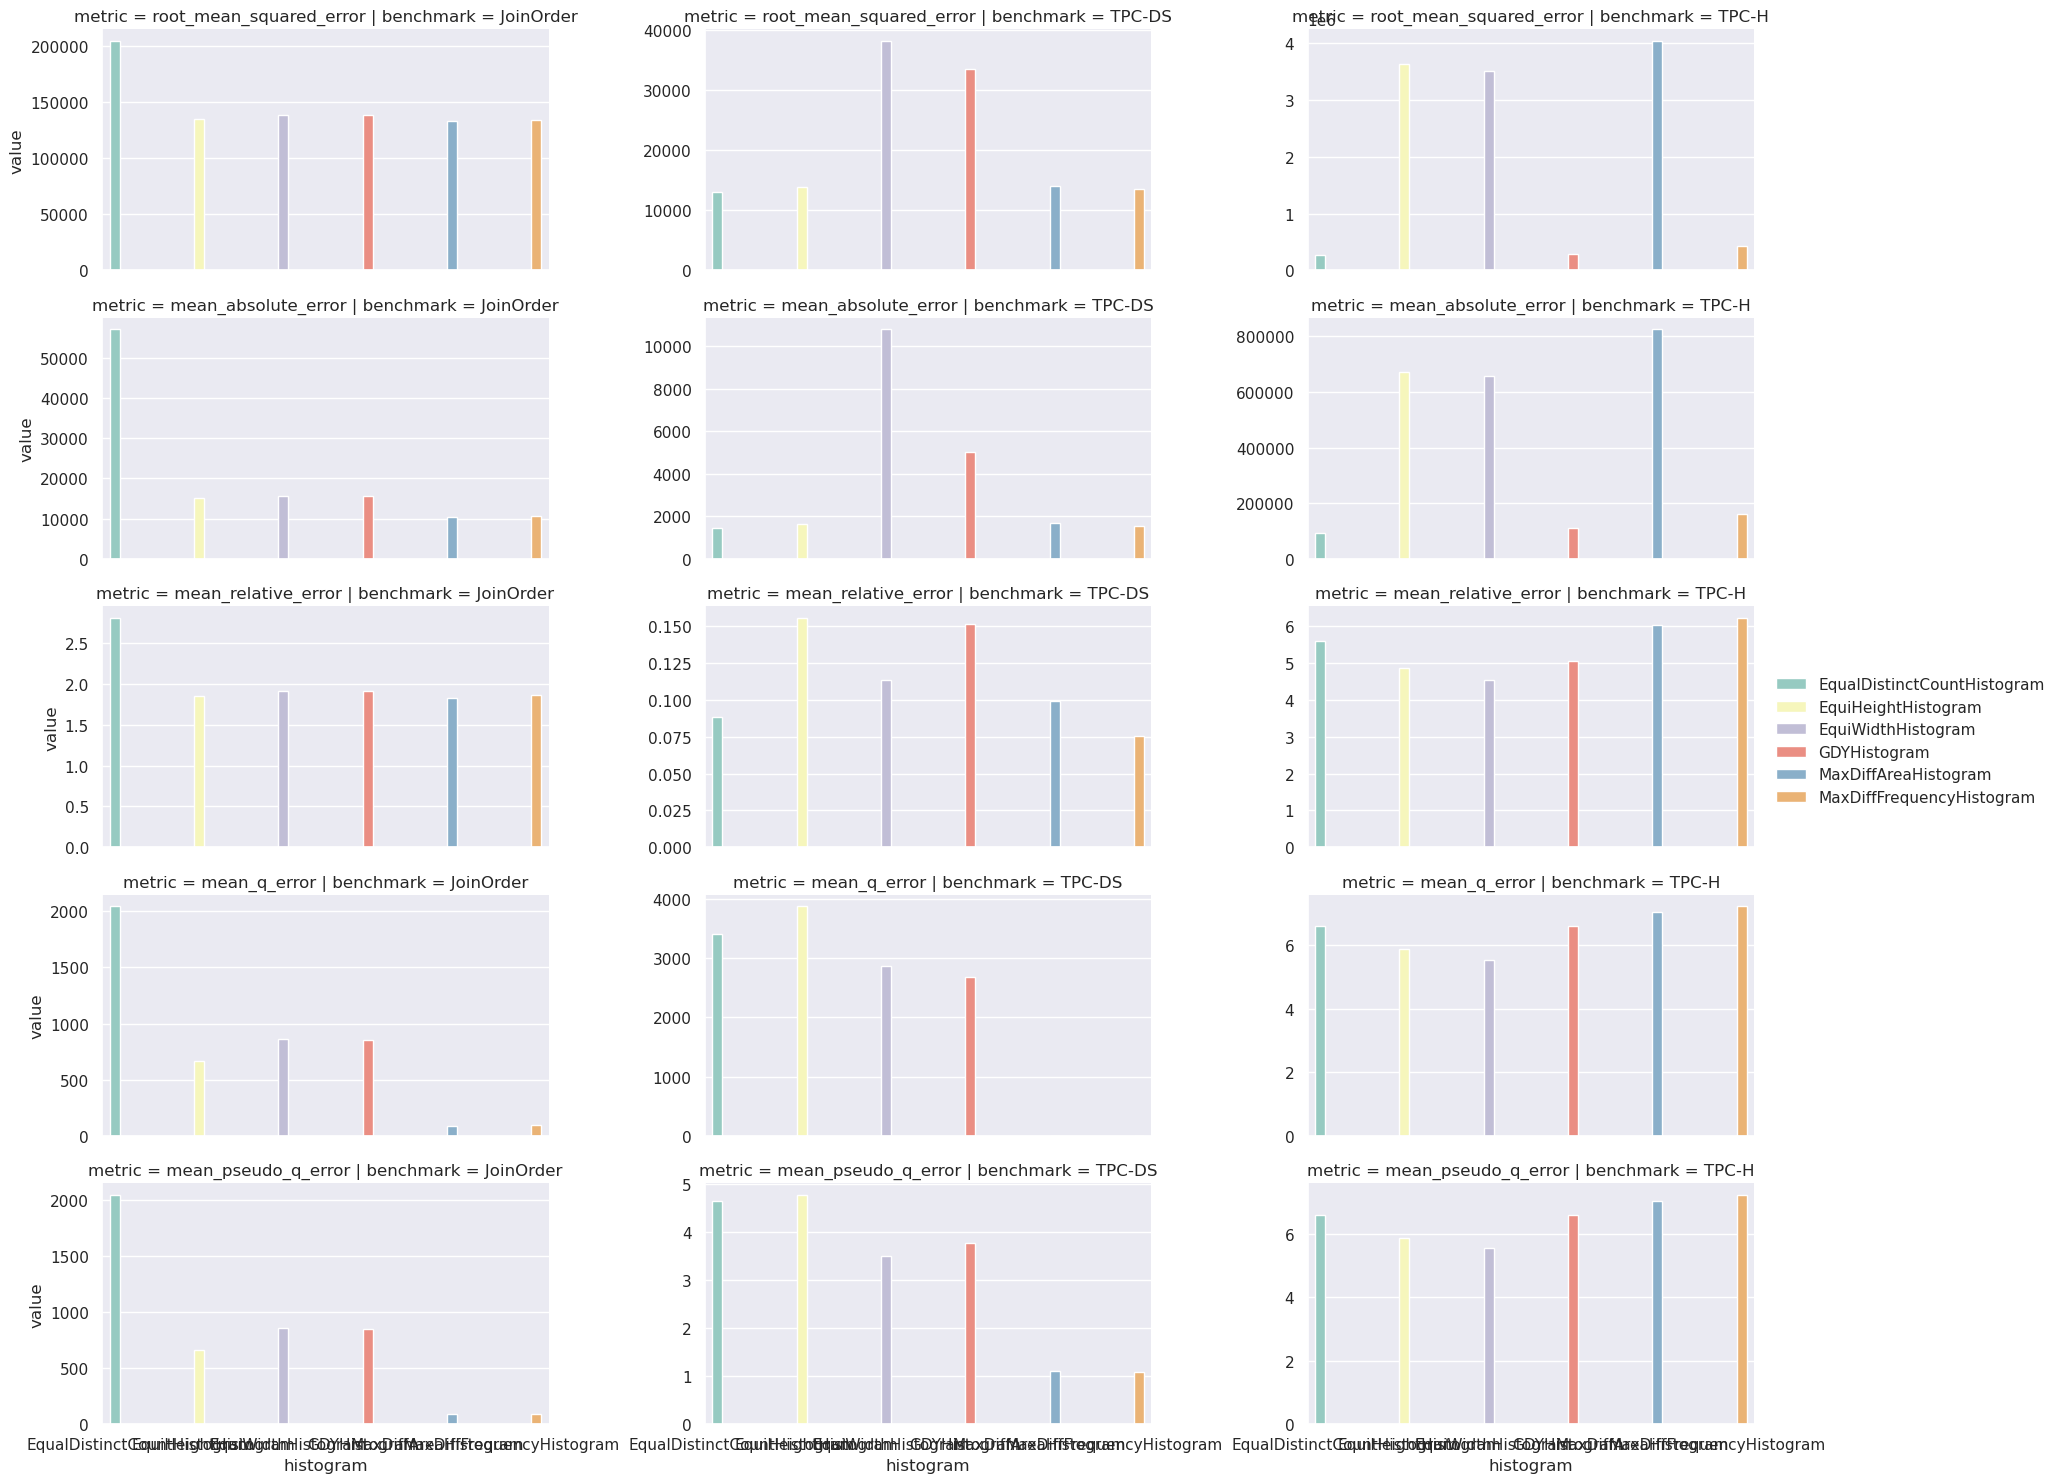

root_mean_squared_error  \
operator_type benchmark histogram                                              
Aggregate     TPC-DS    EqualDistinctCountHistogram                 101989.0   
                        EquiHeightHistogram                         101989.0   
                        GDYHistogram                                101989.0   
                        MaxDiffAreaHistogram                        101989.0   
                        MaxDiffFrequencyHistogram                   101989.0   
              TPC-H     EqualDistinctCountHistogram               44986052.0   
                        EquiHeightHistogram                       44986052.0   
                        EquiWidthHistogram                        44986052.0   
                        GDYHistogram                              44986052.0   
                        MaxDiffAreaHistogram                      44986052.0   
                        MaxDiffFrequencyHistogram                 44986052.0   

                                                     mean_absolute_error  \
operator_type benchmark histogram                                          
Aggregate     TPC-DS    EqualDistinctCountHistogram             101989.0   
                        EquiHeightHistogram                     101989.0   
                        GDYHistogram                            101989.0   
                        MaxDiffAreaHistogram                    101989.0   
                        MaxDiffFrequencyHistogram               101989.0   
              TPC-H     EqualDistinctCountHistogram           44986052.0   
                        EquiHeightHistogram                   44986052.0   
                        EquiWidthHistogram                    44986052.0   
                        GDYHistogram                          44986052.0   
                        MaxDiffAreaHistogram                  44986052.0   
                        MaxDiffFrequencyHistogram             44986052.0   

                                                     mean_relative_error  \
operator_type benchmark histogram                                          
Aggregate     TPC-DS    EqualDistinctCountHistogram          9271.727273   
                        EquiHeightHistogram                  9271.727273   
                        GDYHistogram                         9271.727273   
                        MaxDiffAreaHistogram                 9271.727273   
                        MaxDiffFrequencyHistogram            9271.727273   
              TPC-H     EqualDistinctCountHistogram             2.999070   
                        EquiHeightHistogram                     2.999070   
                        EquiWidthHistogram                      2.999070   
                        GDYHistogram                            2.999070   
                        MaxDiffAreaHistogram                    2.999070   
                        MaxDiffFrequencyHistogram               2.999070   

                                                     mean_q_error  \
operator_type benchmark histogram                                   
Aggregate     TPC-DS    EqualDistinctCountHistogram   9272.727273   
                        EquiHeightHistogram           9272.727273   
                        GDYHistogram                  9272.727273   
                        MaxDiffAreaHistogram          9272.727273   
                        MaxDiffFrequencyHistogram     9272.727273   
              TPC-H     EqualDistinctCountHistogram      3.999070   
                        EquiHeightHistogram              3.999070   
                        EquiWidthHistogram               3.999070   
                        GDYHistogram                     3.999070   
                        MaxDiffAreaHistogram             3.999070   
                        MaxDiffFrequencyHistogram        3.999070   

                                                     mean_pseudo_q_error  
operator_type benchmark histogram                            

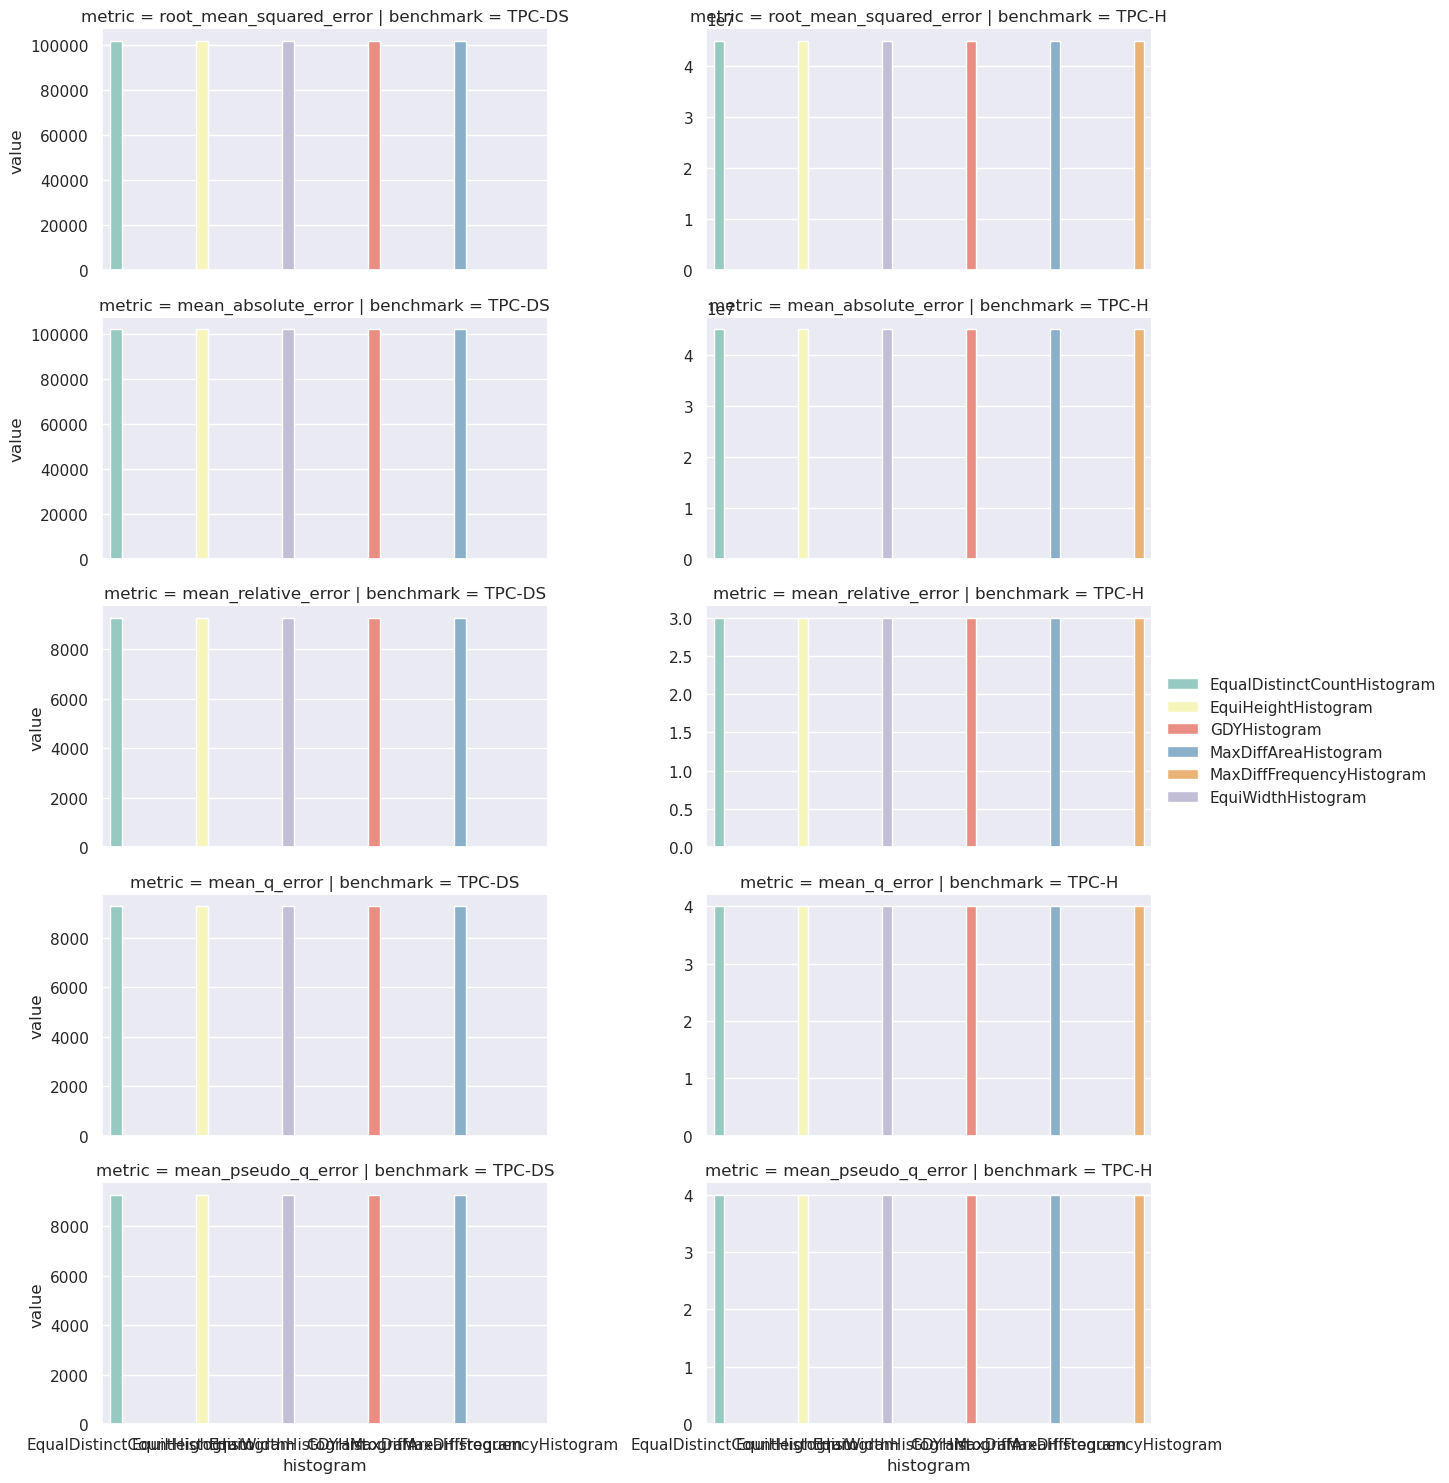

In [82]:
size_before = len(df)
df = df.drop(df[df.real_output == 0].index)
print(f"Removed {len(df)-size_before} ({(size_before-len(df))/size_before:.2%}) rows because the 'real_output' cell was zero.")
df = df.drop(df[df.estimated_output == 0].index)
print(f"Removed {len(df)-size_before} ({(size_before-len(df))/size_before:.2%}) rows because the 'estimated_output' cell was zero.")

df_with_errors = generate_errors(df)

# print as the resulting table is cut by Jupyter
for operator in pd.unique(df_with_errors.operator_type):
    filtered = df_with_errors.query("operator_type == @operator")
    result = filtered.groupby(["operator_type",
                               "benchmark",
                               "histogram"]).agg(root_mean_squared_error=("mean_squared_error", lambda x: np.sqrt(np.mean(x))),
                                                 mean_absolute_error=("absolute_error", np.mean),
                                                 mean_relative_error=("relative_error", np.mean),
                                                 mean_q_error=("q_error", np.mean),
                                                 mean_pseudo_q_error=("pseudo_q_error", np.mean))
    display(result)
    melted_results = pd.melt(result.reset_index(), id_vars=["benchmark", "histogram"],
                             value_vars=["root_mean_squared_error", "mean_absolute_error",
                                         "mean_relative_error", "mean_q_error", "mean_pseudo_q_error"],
                             var_name="metric")
    g = sns.FacetGrid(melted_results, col="benchmark", row="metric", sharey=False, aspect=2)
    g.map_dataframe(sns.barplot, x="histogram", y="value", hue="histogram", palette="Set3")
    g.add_legend()
    plt.savefig(f"{operator}_facet.pdf")
    plt.show()
    display(g)


## compare_operators

In [83]:
grouped = df.groupby(["benchmark", "histogram", "query", "operator_type"]).size()

queries = df[["benchmark", "query"]].drop_duplicates()

# super inefficient, doesn't matter for now
op_counts = {}
for _, outer_benchmark, outer_query in queries.itertuples():
    for (_1, benchmark, histogram, query, operator_type, count) in grouped.reset_index().itertuples():
        if outer_benchmark == benchmark and outer_query == query:
            if (benchmark, query, operator_type) not in op_counts:
                op_counts[(benchmark, query, operator_type)] = count
                continue

            if op_counts[(benchmark, query, operator_type)] != count:
                print(f"WARNING: different value of {count} (previously {op_counts[(benchmark, query, operator_type)]}) for {benchmark}, query {query}, op {operator_type}")


# Build Time Evaluation

In [77]:
build_time_paths = glob.glob("data/20230302/**/*build_times*", recursive=True)
build_time_dataframes = []

for path in build_time_paths:
    benchmark_name = (path.split("/")[-1]).split("-")[0]    
    csv = pd.read_csv(path)
    csv.insert(0, column="BENCHMARK_NAME", value=benchmark_name)    
    build_time_dataframes.append(csv)

build_times = pd.concat(build_time_dataframes)

## Summed Build Time per Benchmark

In [79]:
group_bts = build_times.drop(columns=["COLUMN_ID"]).groupby(["BENCHMARK_NAME", "COLUMN_DATA_TYPE", "HISTOGRAM_NAME"])
group_bts.sum()

TOTAL_COUNT  \
BENCHMARK_NAME COLUMN_DATA_TYPE HISTOGRAM_NAME                              
job            int              EqualDistinctCountHistogram  2.777333e+08   
                                EquiHeightHistogram          2.570862e+08   
                                EquiWidthHistogram           2.570862e+08   
                                GDYHistogram                 2.774373e+08   
                                MaxDiffFrequencyHistogram    2.570862e+08   
               string           EqualDistinctCountHistogram  8.566905e+07   
                                EquiHeightHistogram          2.570072e+08   
                                MaxDiffFrequencyHistogram    8.566905e+07   
tpcc           float            EqualDistinctCountHistogram  4.601780e+06   
                                EquiHeightHistogram          4.601780e+06   
                                EquiWidthHistogram           4.601780e+06   
                                GDYHistogram                 4.601780e+06   
                                MaxDiffFrequencyHistogram    4.601780e+06   
               int              EqualDistinctCountHistogram  3.549202e+07   
                                EquiHeightHistogram          3.549202e+07   
                                EquiWidthHistogram           3.549202e+07   
                                GDYHistogram                 3.549202e+07   
                                MaxDiffFrequencyHistogram    3.549202e+07   
               string           EqualDistinctCountHistogram  1.780222e+07   
                                EquiHeightHistogram          5.340666e+07   
                                MaxDiffFrequencyHistogram    1.780222e+07   
tpcds          float            EqualDistinctCountHistogram  6.867736e+08   
                                EquiHeightHistogram          6.863553e+08   
                                EquiWidthHistogram           6.863553e+08   
                                GDYHistogram                 6.822618e+08   
                                MaxDiffFrequencyHistogram    6.863553e+08   
               int              EqualDistinctCountHistogram  1.323682e+09   
                                EquiHeightHistogram          1.323609e+09   
                                EquiWidthHistogram           1.323609e+09   
                                GDYHistogram                 1.313055e+09   
                                MaxDiffFrequencyHistogram    1.323609e+09   
               string           EqualDistinctCountHistogram  1.645101e+07   
                                EquiHeightHistogram          4.935303e+07   
                                MaxDiffFrequencyHistogram    1.645101e+07   
tpch           float            EqualDistinctCountHistogram  2.665442e+08   
                                EquiHeightHistogram          2.665363e+08   
                                EquiWidthHistogram           2.665363e+08   
                                GDYHistogram                 2.665442e+08   
                                MaxDiffFrequencyHistogram    2.665363e+08   
               int              EqualDistinctCountHistogram  3.161443e+08   
                                EquiHeightHistogram          3.161392e+08   
                                EquiWidthHistogram           3.161392e+08   
                                GDYHistogram                 3.161442e+08   
                                MaxDiffFrequencyHistogram    3.161392e+08   
               string           EqualDistinctCountHistogram  5.427604e+08   
                                EquiHeightHistogram          1.571160e+09   
                                MaxDiffFrequencyHistogram    5.237199e+08   

                                                             BIN_COUNT  \
BENCHMARK_NAME COLUMN_DATA_TYPE HISTOGRAM_NAME                           
job            int              EqualDistinctCountHistogram       3648   
                                EquiHeightHistogram               

### Average Build Times per Benchmark

In [84]:
avg_bts = group_bts.mean()
display(avg_bts)

TOTAL_COUNT  \
BENCHMARK_NAME COLUMN_DATA_TYPE HISTOGRAM_NAME                              
job            int              EqualDistinctCountHistogram  5.049697e+06   
                                EquiHeightHistogram          4.674295e+06   
                                EquiWidthHistogram           4.674295e+06   
                                GDYHistogram                 5.044315e+06   
                                MaxDiffFrequencyHistogram    4.674295e+06   
               string           EqualDistinctCountHistogram  1.784772e+06   
                                EquiHeightHistogram          1.784772e+06   
                                MaxDiffFrequencyHistogram    1.784772e+06   
tpcc           float            EqualDistinctCountHistogram  4.183436e+05   
                                EquiHeightHistogram          4.183436e+05   
                                EquiWidthHistogram           4.183436e+05   
                                GDYHistogram                 4.183436e+05   
                                MaxDiffFrequencyHistogram    4.183436e+05   
               int              EqualDistinctCountHistogram  8.253958e+05   
                                EquiHeightHistogram          8.253958e+05   
                                EquiWidthHistogram           8.253958e+05   
                                GDYHistogram                 8.253958e+05   
                                MaxDiffFrequencyHistogram    8.253958e+05   
               string           EqualDistinctCountHistogram  4.684795e+05   
                                EquiHeightHistogram          4.684795e+05   
                                MaxDiffFrequencyHistogram    4.684795e+05   
tpcds          float            EqualDistinctCountHistogram  8.584670e+06   
                                EquiHeightHistogram          8.579442e+06   
                                EquiWidthHistogram           8.579442e+06   
                                GDYHistogram                 8.528272e+06   
                                MaxDiffFrequencyHistogram    8.579442e+06   
               int              EqualDistinctCountHistogram  7.040864e+06   
                                EquiHeightHistogram          7.040472e+06   
                                EquiWidthHistogram           7.040472e+06   
                                GDYHistogram                 6.984336e+06   
                                MaxDiffFrequencyHistogram    7.040472e+06   
               string           EqualDistinctCountHistogram  1.061355e+05   
                                EquiHeightHistogram          1.061355e+05   
                                MaxDiffFrequencyHistogram    1.061355e+05   
tpch           float            EqualDistinctCountHistogram  2.961602e+07   
                                EquiHeightHistogram          2.961514e+07   
                                EquiWidthHistogram           2.961514e+07   
                                GDYHistogram                 2.961602e+07   
                                MaxDiffFrequencyHistogram    2.961514e+07   
               int              EqualDistinctCountHistogram  1.663917e+07   
                                EquiHeightHistogram          1.663890e+07   
                                EquiWidthHistogram           1.663890e+07   
                                GDYHistogram                 1.663917e+07   
                                MaxDiffFrequencyHistogram    1.663890e+07   
               string           EqualDistinctCountHistogram  1.644728e+07   
                                EquiHeightHistogram          1.587030e+07   
                                MaxDiffFrequencyHistogram    1.587030e+07   

                                                             BIN_COUNT  \
BENCHMARK_NAME COLUMN_DATA_TYPE HISTOGRAM_NAME                           
job            int              EqualDistinctCountHistogram  66.327273   
                                EquiHeightHistogram          66.32

## Total Build Times

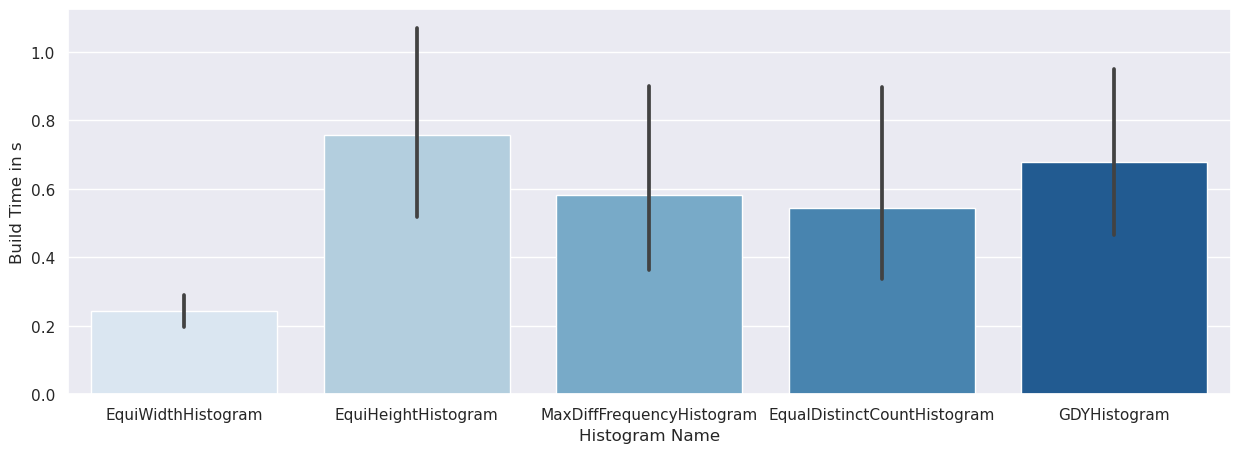

In [61]:
sns.set_context('paper')
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = 'HISTOGRAM_NAME', y = 'BUILD_TIME', data = build_times,
            palette = 'Blues', edgecolor = 'w')
ax.set(xlabel='Histogram Name', ylabel='Build Time in s')
plt.show()

## Normed per 1'000'000 Values

In [85]:
normed_build_times = avg_bts.reset_index()
for index, unnormed_bt in normed_build_times.iterrows():
    bt = unnormed_bt
    
    norm_parameter = 1_000_000    
    ratio = norm_parameter / bt["TOTAL_COUNT"]
    normed_build_time = bt["BUILD_TIME"] * ratio
    
    bt["BUILD_TIME"] = normed_build_time
    bt["TOTAL_COUNT"] = norm_parameter
    
    normed_build_times.iloc[index] = unnormed_bt

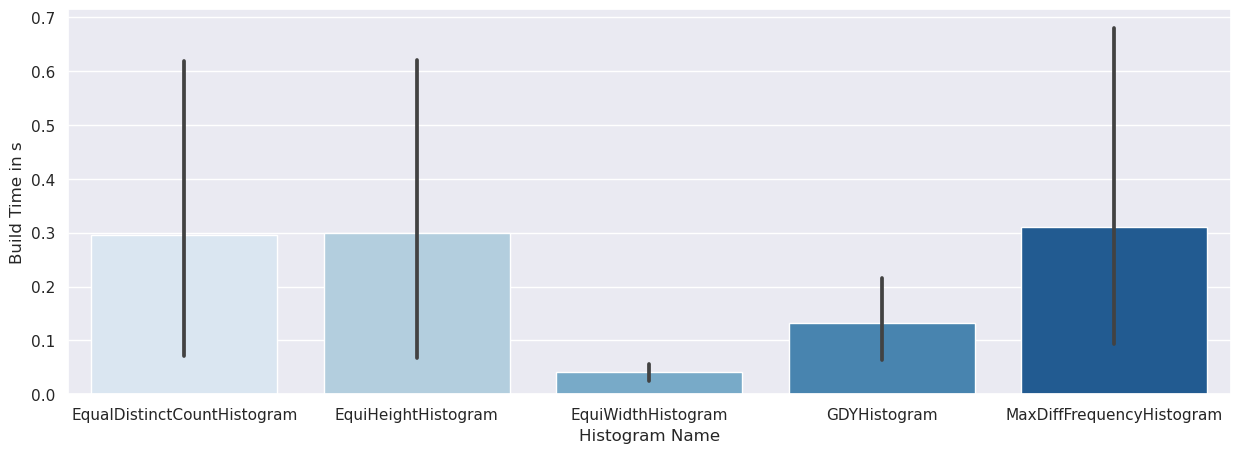

In [86]:
sns.set_context('paper')
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = 'HISTOGRAM_NAME', y = 'BUILD_TIME', data = normed_build_times,
            palette = 'Blues', edgecolor = 'w')
ax.set(xlabel='Histogram Name', ylabel='Build Time in s')
plt.show()